## 1. Import Libraries và Load Data

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from tqdm import tqdm

# Cấu hình visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Load dataset
data_path = '../data/finetune_llm/finetune_llm_data.jsonl'

data = []
with open(data_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, desc='Loading data'):
        data.append(json.loads(line))

df = pd.DataFrame(data)
print(f"\n✓ Đã load {len(df):,} mẫu dữ liệu")
print(f"✓ Columns: {list(df.columns)}")

Loading data: 97522it [00:00, 106051.75it/s]


✓ Đã load 97,522 mẫu dữ liệu
✓ Columns: ['instruction', 'input', 'output']


## 2. Thống Kê Cơ Bản

In [3]:
# Hiển thị mẫu dữ liệu
print("=" * 80)
print("MẪU DỮ LIỆU:")
print("=" * 80)
for i in range(min(3, len(df))):
    print(f"\n[Mẫu {i+1}]")
    print(f"Instruction: {df.iloc[i]['instruction']}")
    print(f"Input: {df.iloc[i]['input'][:100]}...")
    print(f"Output: {df.iloc[i]['output'][:200]}...")
    print("-" * 80)

MẪU DỮ LIỆU:

[Mẫu 1]
Instruction: Trả lời câu hỏi pháp luật sau:
Input: Trong Bộ luật Hình sự thì bao nhiêu tuổi được xem là người già, người cao tuổi?...
Output: Người cao tuổi, người già, người già yếu được quy định tại Điều 2 Luật Người cao tuổi 2009: "Người cao tuổi được quy định trong Luật này là công dân Việt Nam từ đủ 60 tuổi trở lên." hay tại Bộ luật La...
--------------------------------------------------------------------------------

[Mẫu 2]
Instruction: Trả lời câu hỏi pháp luật sau:
Input: Người được bảo hiểm tiền gửi có quyền và nghĩa vụ ra sao?...
Output: Căn cứ theo Điều 11 Luật Bảo hiểm tiền gửi 2012 quy định quyền và nghĩa vụ của người được bảo hiểm tiền gửi như sau: - Được bảo hiểm số tiền gửi của mình tại tổ chức tham gia bảo hiểm tiền gửi theo qu...
--------------------------------------------------------------------------------

[Mẫu 3]
Instruction: Trả lời câu hỏi pháp luật sau:
Input: Thời điểm tổ chức tài chính vi mô thực hiện trích lập dự phòng rủi ro là khi 

In [4]:
# Kiểm tra missing values
print("\n📊 MISSING VALUES:")
print(df.isnull().sum())
print(f"\nTổng số mẫu: {len(df):,}")
print(f"Mẫu hoàn chỉnh: {df.dropna().shape[0]:,}")


📊 MISSING VALUES:
instruction    0
input          0
output         0
dtype: int64

Tổng số mẫu: 97,522
Mẫu hoàn chỉnh: 97,522


## 3. Phân Tích Độ Dài Text

In [5]:
# Tính độ dài cho từng field
df['instruction_len'] = df['instruction'].apply(len)
df['input_len'] = df['input'].apply(len)
df['output_len'] = df['output'].apply(len)
df['total_len'] = df['instruction_len'] + df['input_len'] + df['output_len']

# Đếm số từ (word count)
df['input_words'] = df['input'].apply(lambda x: len(x.split()))
df['output_words'] = df['output'].apply(lambda x: len(x.split()))

# Thống kê
print("\n📏 THỐNG KÊ ĐỘ DÀI (characters):")
print("=" * 80)
stats_df = df[['instruction_len', 'input_len', 'output_len', 'total_len']].describe()
print(stats_df.round(2))

print("\n📝 THỐNG KÊ SỐ TỪ:")
print("=" * 80)
word_stats = df[['input_words', 'output_words']].describe()
print(word_stats.round(2))


📏 THỐNG KÊ ĐỘ DÀI (characters):
       instruction_len  input_len  output_len  total_len
count          97522.0   97522.00    97522.00   97522.00
mean              30.0     160.41     1212.72    1403.13
std                0.0     213.92      904.97     956.38
min               30.0      10.00       51.00     104.00
25%               30.0      61.00      565.00     711.25
50%               30.0      83.00      992.00    1196.00
75%               30.0     131.00     1612.00    1831.00
max               30.0    1998.00     7981.00    9614.00

📝 THỐNG KÊ SỐ TỪ:
       input_words  output_words
count     97522.00      97522.00
mean         36.54        268.08
std          49.63        200.46
min           1.00         12.00
25%          14.00        125.00
50%          19.00        219.00
75%          29.00        356.00
max         481.00       1842.00


/tmp/ipykernel_15273/751442299.py:39: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/751442299.py:39: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/751442299.py:39: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/751442299.py:39: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/751442299.py:39: UserWarning: Glyph 7915 (\N{LATIN SMALL LETTER U WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/mikeethanh/anaconda3/envs/dl/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7847 (\N{LATIN SMALL LET

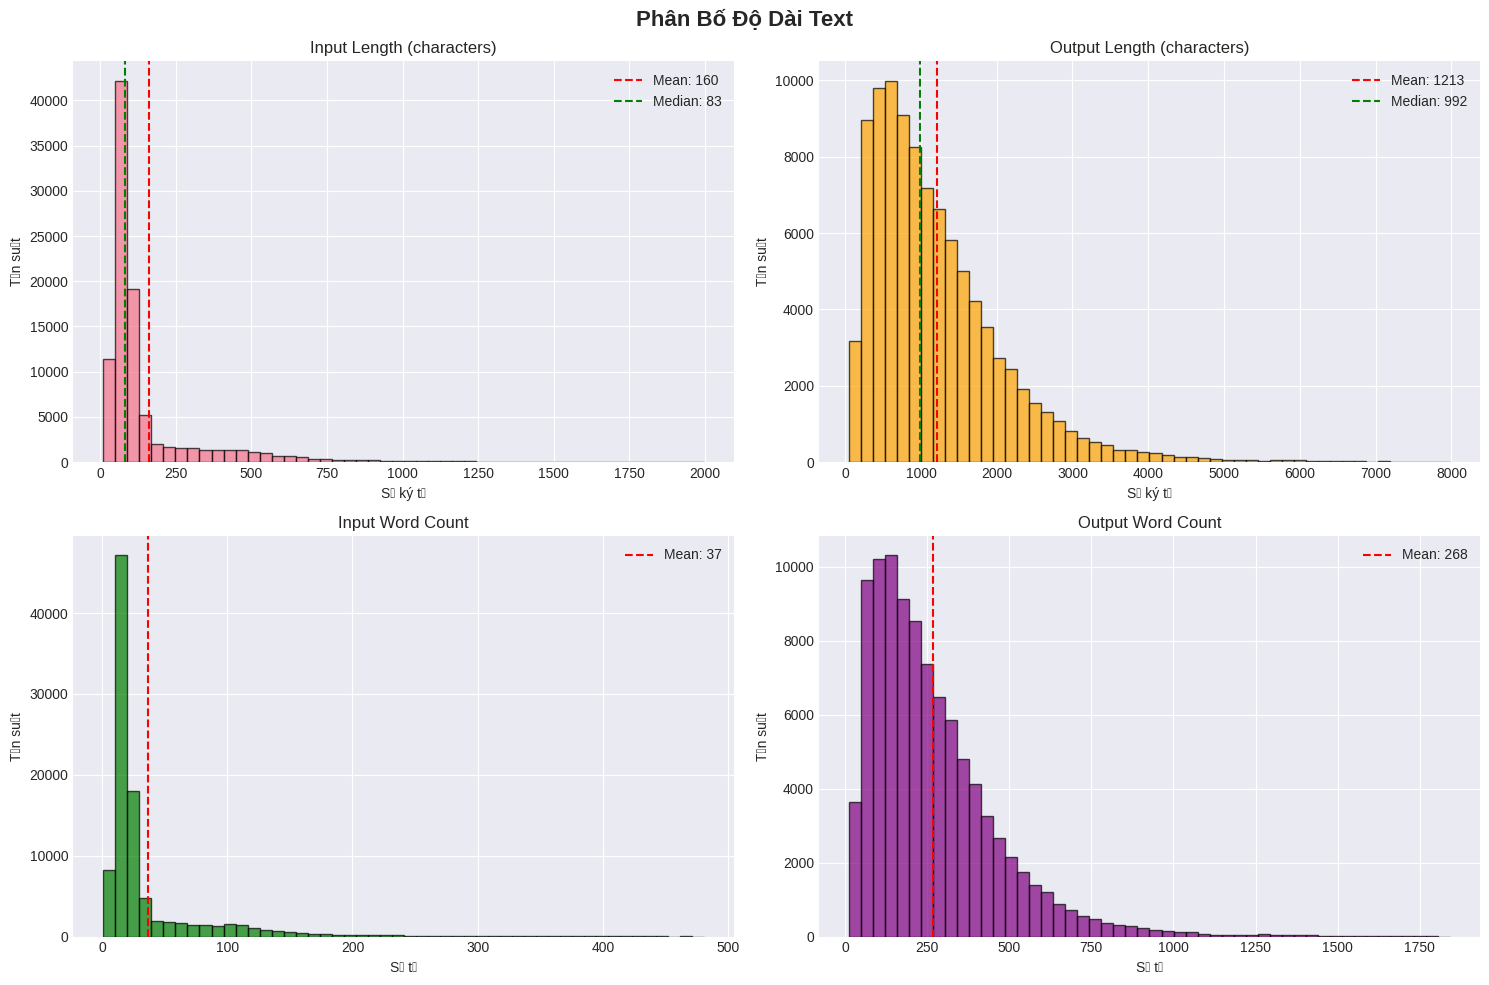

In [6]:
# Visualization: Phân bố độ dài
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Phân Bố Độ Dài Text', fontsize=16, fontweight='bold')

# Input length
axes[0, 0].hist(df['input_len'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['input_len'].mean(), color='red', linestyle='--', label=f'Mean: {df["input_len"].mean():.0f}')
axes[0, 0].axvline(df['input_len'].median(), color='green', linestyle='--', label=f'Median: {df["input_len"].median():.0f}')
axes[0, 0].set_title('Input Length (characters)')
axes[0, 0].set_xlabel('Số ký tự')
axes[0, 0].set_ylabel('Tần suất')
axes[0, 0].legend()

# Output length
axes[0, 1].hist(df['output_len'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].axvline(df['output_len'].mean(), color='red', linestyle='--', label=f'Mean: {df["output_len"].mean():.0f}')
axes[0, 1].axvline(df['output_len'].median(), color='green', linestyle='--', label=f'Median: {df["output_len"].median():.0f}')
axes[0, 1].set_title('Output Length (characters)')
axes[0, 1].set_xlabel('Số ký tự')
axes[0, 1].set_ylabel('Tần suất')
axes[0, 1].legend()

# Input words
axes[1, 0].hist(df['input_words'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].axvline(df['input_words'].mean(), color='red', linestyle='--', label=f'Mean: {df["input_words"].mean():.0f}')
axes[1, 0].set_title('Input Word Count')
axes[1, 0].set_xlabel('Số từ')
axes[1, 0].set_ylabel('Tần suất')
axes[1, 0].legend()

# Output words
axes[1, 1].hist(df['output_words'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].axvline(df['output_words'].mean(), color='red', linestyle='--', label=f'Mean: {df["output_words"].mean():.0f}')
axes[1, 1].set_title('Output Word Count')
axes[1, 1].set_xlabel('Số từ')
axes[1, 1].set_ylabel('Tần suất')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 4. Phân Tích Nội Dung & Keywords

In [7]:
# Trích xuất các văn bản pháp luật được nhắc đến
import re

# Patterns để tìm văn bản pháp luật
law_patterns = [
    r'Luật [\w\s,]+\d{4}',
    r'Bộ luật [\w\s]+\d{4}',
    r'Nghị định \d+/\d+/NĐ-CP',
    r'Thông tư \d+/\d+/TT-[\w]+',
    r'Điều \d+',
]

all_laws = []
all_articles = []

for text in tqdm(df['output'], desc='Extracting legal references'):
    # Tìm luật, nghị định
    for pattern in law_patterns[:4]:
        matches = re.findall(pattern, text)
        all_laws.extend(matches)
    
    # Tìm điều luật
    articles = re.findall(r'Điều \d+', text)
    all_articles.extend(articles)

# Top văn bản pháp luật được trích dẫn nhiều nhất
law_counter = Counter(all_laws)
print("\n⚖️  TOP 20 VĂN BẢN PHÁP LUẬT ĐƯỢC TRÍCH DẪN:")
print("=" * 80)
for law, count in law_counter.most_common(20):
    print(f"{law:<50} : {count:>6,} lần")

Extracting legal references: 100%|██████████| 97522/97522 [00:00<00:00, 153590.93it/s]


⚖️  TOP 20 VĂN BẢN PHÁP LUẬT ĐƯỢC TRÍCH DẪN:
Bộ luật Dân sự 2015                                :  5,056 lần
Bộ luật dân sự 2015                                :  4,139 lần
Luật Hôn nhân và gia đình 2014                     :  3,321 lần
Bộ luật Lao động 2019                              :  2,159 lần
Luật Bảo hiểm xã hội 2014                          :  1,724 lần
Luật Hộ tịch 2014                                  :  1,524 lần
Bộ luật Hình sự 2015                               :  1,380 lần
Bộ luật dân sự 2005                                :  1,369 lần
Luật Cư trú 2020                                   :  1,039 lần
Nghị định 123/2015/NĐ-CP                           :  1,030 lần
Luật Đất đai 2013                                  :    917 lần
Nghị định 144/2021/NĐ-CP                           :    913 lần
Luật Sở hữu trí tuệ 2005                           :    905 lần
Bộ luật Dân sự 2005                                :    905 lần
Luật Nghĩa vụ quân sự 2015                         :    88

/tmp/ipykernel_15273/2749694550.py:13: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/2749694550.py:13: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/2749694550.py:13: UserWarning: Glyph 7851 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/2749694550.py:13: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/2749694550.py:13: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/2749694550.py:13: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) mis

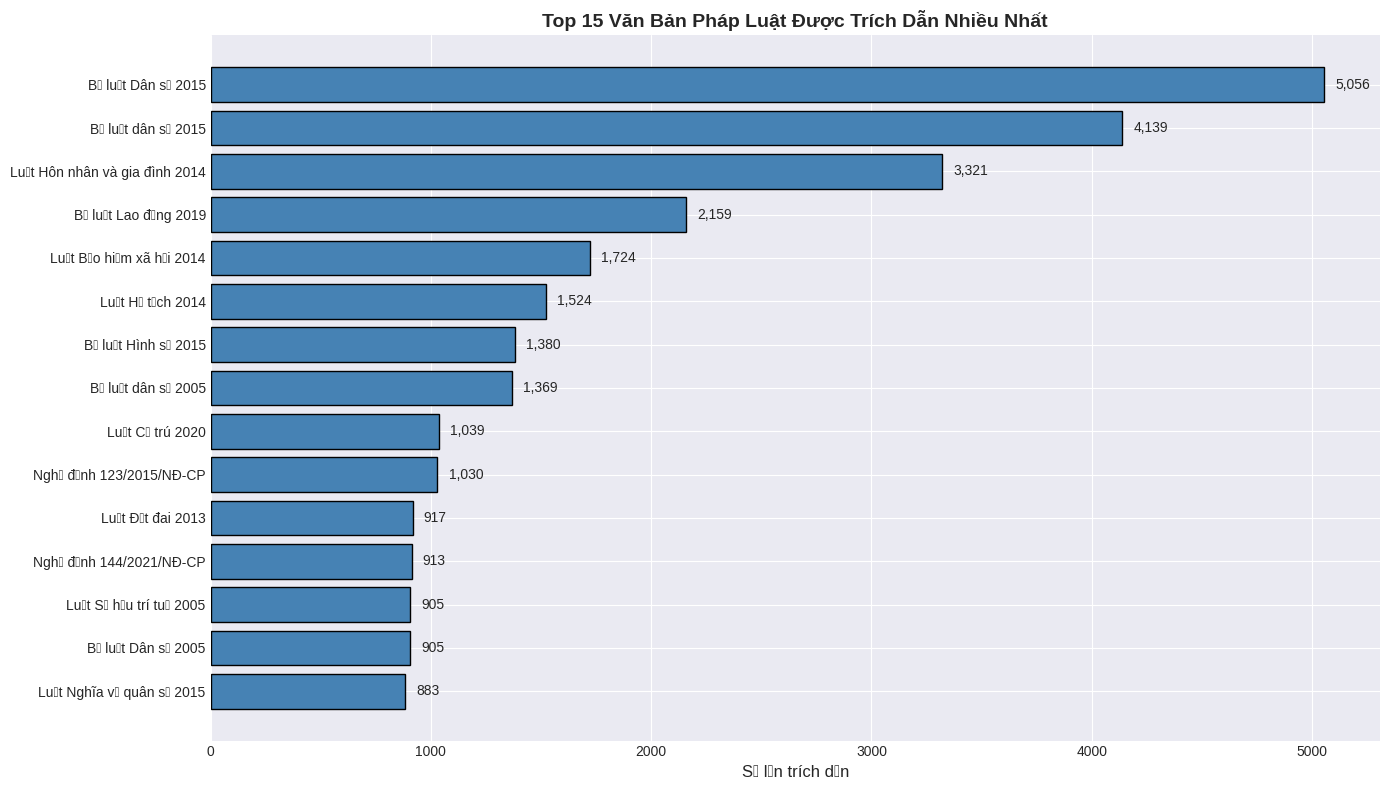

In [8]:
# Visualization: Top văn bản pháp luật
top_laws = law_counter.most_common(15)
laws, counts = zip(*top_laws)

plt.figure(figsize=(14, 8))
plt.barh(range(len(laws)), counts, color='steelblue', edgecolor='black')
plt.yticks(range(len(laws)), laws)
plt.xlabel('Số lần trích dẫn', fontsize=12)
plt.title('Top 15 Văn Bản Pháp Luật Được Trích Dẫn Nhiều Nhất', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(counts):
    plt.text(v + 50, i, f'{v:,}', va='center')
plt.tight_layout()
plt.show()

## 5. Phân Tích Chủ Đề/Lĩnh Vực

In [9]:
# Tìm các lĩnh vực pháp luật - MỞ RỘNG VÀ CHI TIẾT HƠN
legal_domains = {
    'Lao động': [
        'lao động', 'người lao động', 'hợp đồng lao động', 'sa thải', 
        'bảo hiểm xã hội', 'nghỉ việc', 'trợ cấp thất nghiệp', 'tiền lương',
        'tiền công', 'làm thêm giờ', 'chế độ nghỉ', 'nghỉ phép', 'thai sản',
        'người sử dụng lao động', 'chấm dứt hợp đồng', 'kỷ luật lao động'
    ],
    
    'Hình sự': [
        # Tội phạm chung
        'hình sự', 'tội phạm', 'án tù', 'phạt tù', 'truy cứu', 'truy tố',
        'bị cáo', 'bị hại', 'tội danh', 'hành vi phạm tội', 'cố ý', 'vô ý',
        'đồng phạm', 'tái phạm', 'người phạm tội', 'chủ mưu', 'giúp sức',
        
        # Tội xâm phạm an ninh quốc gia
        'phản bội tổ quốc', 'gián điệp', 'phá hoại', 'khủng bố',
        'lật đổ', 'hoạt động nhằm lật đổ',
        
        # Tội xâm phạm tính mạng, sức khỏe
        'giết người', 'cố ý gây thương tích', 'vô ý gây thương tích',
        'hành hạ', 'hiếp dâm', 'cưỡng dâm', 'giao cấu', 'dâm ô',
        'mua bán người', 'bắt cóc', 'chiếm đoạt trẻ em',
        
        # Tội xâm phạm tự do, danh dự
        'xâm phạm chỗ ở', 'xâm phạm bí mật', 'vu khống', 'làm nhục',
        'bắt giữ trái pháp luật', 'giam giữ trái pháp luật',
        
        # Tội về tài sản
        'cướp', 'cướp tài sản', 'cướp giật', 'trộm cắp', 'trộm cắp tài sản',
        'lừa đảo', 'lừa đảo chiếm đoạt tài sản', 'chiếm đoạt tài sản',
        'cưỡng đoạt', 'cưỡng đoạt tài sản', 'đe dọa', 'khống chế',
        'tham ô', 'tham ô tài sản', 'thiệt hại tài sản', 'phá hủy tài sản',
        'tiêu thụ tài sản', 'tài sản trộm cắp',
        
        # Tội về ma túy
        'ma túy', 'chất ma túy', 'tàng trữ trái phép', 'mua bán trái phép',
        'vận chuyển trái phép', 'tổ chức sử dụng trái phép', 'heroin',
        'cocaine', 'methamphetamine', 'thuốc phiện', 'cần sa',
        
        # Tội về trật tự công cộng
        'gây rối', 'gây rối trật tự công cộng', 'đánh nhau', 'đánh bạc',
        'tổ chức đánh bạc', 'chứa chấp', 'mại dâm', 'tổ chức mại dâm',
        'môi giới mại dâm', 'chứa chấp mại dâm',
        
        # Tội về tham nhũng
        'tham nhũng', 'hối lộ', 'đưa hối lộ', 'nhận hối lộ', 'tham ô',
        'lợi dụng chức vụ quyền hạn', 'lạm dụng chức vụ', 'biển thủ',
        
        # Tội về môi trường
        'gây ô nhiễm', 'ô nhiễm môi trường', 'xả thải', 'phá rừng',
        'khai thác trái phép', 'săn bắn trái phép', 'buôn bán trái phép động vật',
        
        # Tội về giao thông
        'vi phạm giao thông', 'gây tai nạn giao thông', 'lái xe gây tai nạn',
        'lái xe trong tình trạng say', 'bỏ trốn sau tai nạn',
        
        # Hình phạt và xử lý
        'tù chung thân', 'tử hình', 'cải tạo không giam giữ', 'quản chế',
        'cấm cư trú', 'tịch thu', 'án treo', 'giảm án', 'tha tù',
        'tiền phạt', 'phạt tiền', 'tạm giam', 'tạm giữ', 'khởi tố',
        'điều tra', 'công an điều tra', 'viện kiểm sát', 'tòa án',
    ],
    
    'Dân sự': [
        'dân sự', 'hôn nhân', 'ly hôn', 'kết hôn', 'đăng ký kết hôn',
        'tài sản', 'thừa kế', 'di sản', 'di chúc', 'phân chia tài sản',
        'quyền sở hữu', 'quyền sử dụng', 'hợp đồng', 'tranh chấp',
        'bồi thường', 'thiệt hại', 'nuôi con', 'quyền nuôi con',
        'chế độ tài sản vợ chồng', 'tài sản chung', 'tài sản riêng',
        'nghĩa vụ dân sự', 'quyền dân sự', 'đại diện', 'ủy quyền'
    ],
    
    'Đất đai': [
        'đất đai', 'quyền sử dụng đất', 'thu hồi đất', 'giao đất', 'cho thuê đất',
        'chuyển nhượng quyền sử dụng đất', 'cấp giấy chứng nhận', 'sổ đỏ',
        'bồi thường giải phóng mặt bằng', 'tranh chấp đất đai', 'đất ở',
        'đất nông nghiệp', 'đất phi nông nghiệp', 'hạn mức đất', 'thời hạn sử dụng đất'
    ],
    
    'Thuế': [
        'thuế', 'khai thuế', 'nộp thuế', 'miễn thuế', 'giảm thuế',
        'thuế thu nhập', 'thuế gtgt', 'thuế giá trị gia tăng', 'thuế tncn',
        'thuế thu nhập cá nhân', 'thuế tndn', 'thuế thu nhập doanh nghiệp',
        'hóa đơn', 'chứng từ thuế', 'quyết toán thuế', 'hoàn thuế',
        'trốn thuế', 'nợ thuế', 'phạt chậm nộp'
    ],
    
    'Bảo hiểm': [
        'bảo hiểm', 'bhyt', 'bhxh', 'bảo hiểm y tế', 'bảo hiểm xã hội',
        'bảo hiểm thất nghiệp', 'bhtn', 'đóng bảo hiểm', 'trợ cấp',
        'lương hưu', 'chế độ hưu trí', 'tai nạn lao động', 'bệnh nghề nghiệp',
        'thẻ bhyt', 'sổ bhxh', 'đóng bhxh', 'hưởng bhxh'
    ],
    
    'Doanh nghiệp': [
        'doanh nghiệp', 'công ty', 'kinh doanh', 'đầu tư', 'thành lập công ty',
        'giải thể', 'phá sản', 'đăng ký kinh doanh', 'giấy phép kinh doanh',
        'mã số thuế', 'doanh nghiệp tư nhân', 'công ty tnhh', 'công ty cổ phần',
        'hợp đồng kinh tế', 'tranh chấp thương mại', 'cổ đông', 'vốn điều lệ'
    ],
    
    'Giao thông': [
        'giao thông', 'phương tiện', 'lái xe', 'bằng lái', 'bằng lái xe',
        'giấy phép lái xe', 'đăng ký xe', 'vi phạm giao thông', 'nồng độ cồn',
        'phạt nguội', 'tạm giữ phương tiện', 'biển số xe', 'sang tên xe',
        'đường bộ', 'luật giao thông', 'an toàn giao thông'
    ],
    
    'Giáo dục': [
        'giáo dục', 'học sinh', 'sinh viên', 'trường học', 'đại học',
        'thi cử', 'tuyển sinh', 'văn bằng', 'chứng chỉ', 'bằng tốt nghiệp',
        'học phí', 'học bổng', 'miễn giảm học phí', 'giáo viên', 'nhà giáo',
        'chương trình đào tạo', 'đào tạo', 'bồi dưỡng'
    ],
    
    'Y tế': [
        'y tế', 'khám bệnh', 'chữa bệnh', 'bệnh viện', 'bác sĩ', 'điều trị',
        'thuốc', 'dược phẩm', 'cơ sở khám chữa bệnh', 'phòng khám',
        'hành nghề y', 'giấy phép hành nghề', 'bệnh nhân', 'quyền bệnh nhân',
        'chi phí khám chữa bệnh', 'viện phí', 'kê đơn', 'sai phạm y tế'
    ],
}

# Classify samples - Tăng độ chính xác
df['domains'] = ''  # Lưu tất cả các domain phù hợp
domain_counts = {domain: 0 for domain in legal_domains}
domain_samples = {domain: [] for domain in legal_domains}  # Lưu index của samples

for idx, row in tqdm(df.iterrows(), total=len(df), desc='Classifying domains'):
    text_lower = (str(row['input']) + ' ' + str(row['output'])).lower()
    matched_domains = []
    
    for domain, keywords in legal_domains.items():
        # Đếm số keyword khớp
        matched_keywords = [kw for kw in keywords if kw in text_lower]
        if matched_keywords:
            domain_counts[domain] += 1
            matched_domains.append(domain)
            domain_samples[domain].append(idx)
    
    df.at[idx, 'domains'] = ', '.join(matched_domains)

# Sort và hiển thị
domain_counts_sorted = dict(sorted(domain_counts.items(), key=lambda x: x[1], reverse=True))

print("\n📚 PHÂN BỐ THEO LĨNH VỰC PHÁP LUẬT:")
print("=" * 80)
for domain, count in domain_counts_sorted.items():
    percentage = (count / len(df)) * 100
    print(f"{domain:<20} : {count:>6,} mẫu ({percentage:>5.2f}%)")

# Hiển thị thống kê chi tiết
print("\n📊 THỐNG KÊ CHI TIẾT:")
print("=" * 80)
print(f"Tổng số mẫu: {len(df):,}")
print(f"Mẫu được phân loại: {len(df[df['domains'] != '']):,}")
print(f"Mẫu chưa phân loại: {len(df[df['domains'] == '']):,}")
print(f"Mẫu thuộc nhiều lĩnh vực: {len(df[df['domains'].str.contains(',')]):,}")

Classifying domains: 100%|██████████| 97522/97522 [00:29<00:00, 3300.89it/s]


📚 PHÂN BỐ THEO LĨNH VỰC PHÁP LUẬT:
Dân sự               : 46,519 mẫu (47.70%)
Hình sự              : 23,023 mẫu (23.61%)
Doanh nghiệp         : 20,431 mẫu (20.95%)
Lao động             : 15,685 mẫu (16.08%)
Giáo dục             : 12,958 mẫu (13.29%)
Bảo hiểm             :  8,835 mẫu ( 9.06%)
Đất đai              :  8,818 mẫu ( 9.04%)
Y tế                 :  8,817 mẫu ( 9.04%)
Giao thông           :  8,652 mẫu ( 8.87%)
Thuế                 :  4,407 mẫu ( 4.52%)

📊 THỐNG KÊ CHI TIẾT:
Tổng số mẫu: 97,522
Mẫu được phân loại: 78,941
Mẫu chưa phân loại: 18,581
Mẫu thuộc nhiều lĩnh vực: 46,971



⚖️ PHÂN TÍCH CHI TIẾT LĨNH VỰC HÌNH SỰ:
Tổng số mẫu Hình sự: 23,023
Tỷ lệ: 23.61%
Độ dài trung bình Output: 335 từ
Độ dài tối đa Output: 1,842 từ

📋 PHÂN LOẠI THEO LOẠI TỘI PHẠM:
  Tội về tài sản            : 1,591 (  6.9%)
  Tội xâm phạm tính mạng    : 1,357 (  5.9%)
  Tội về ma túy             : 1,023 (  4.4%)
  Tội về tham nhũng         :   833 (  3.6%)
  Tội gây rối trật tự       :   542 (  2.4%)
  Tội giao thông            :   473 (  2.1%)

📋 PHÂN LOẠI THEO LOẠI TỘI PHẠM:
  Tội về tài sản            : 1,591 (  6.9%)
  Tội xâm phạm tính mạng    : 1,357 (  5.9%)
  Tội về ma túy             : 1,023 (  4.4%)
  Tội về tham nhũng         :   833 (  3.6%)
  Tội gây rối trật tự       :   542 (  2.4%)
  Tội giao thông            :   473 (  2.1%)


/tmp/ipykernel_15273/917780883.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_compare, y='primary_domain', x='output_words',
/tmp/ipykernel_15273/917780883.py:79: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/917780883.py:79: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/917780883.py:79: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_15273/917780883.py:79: UserWarning: Glyph 7909 (\N{LATIN SMALL LETTER U WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_1527

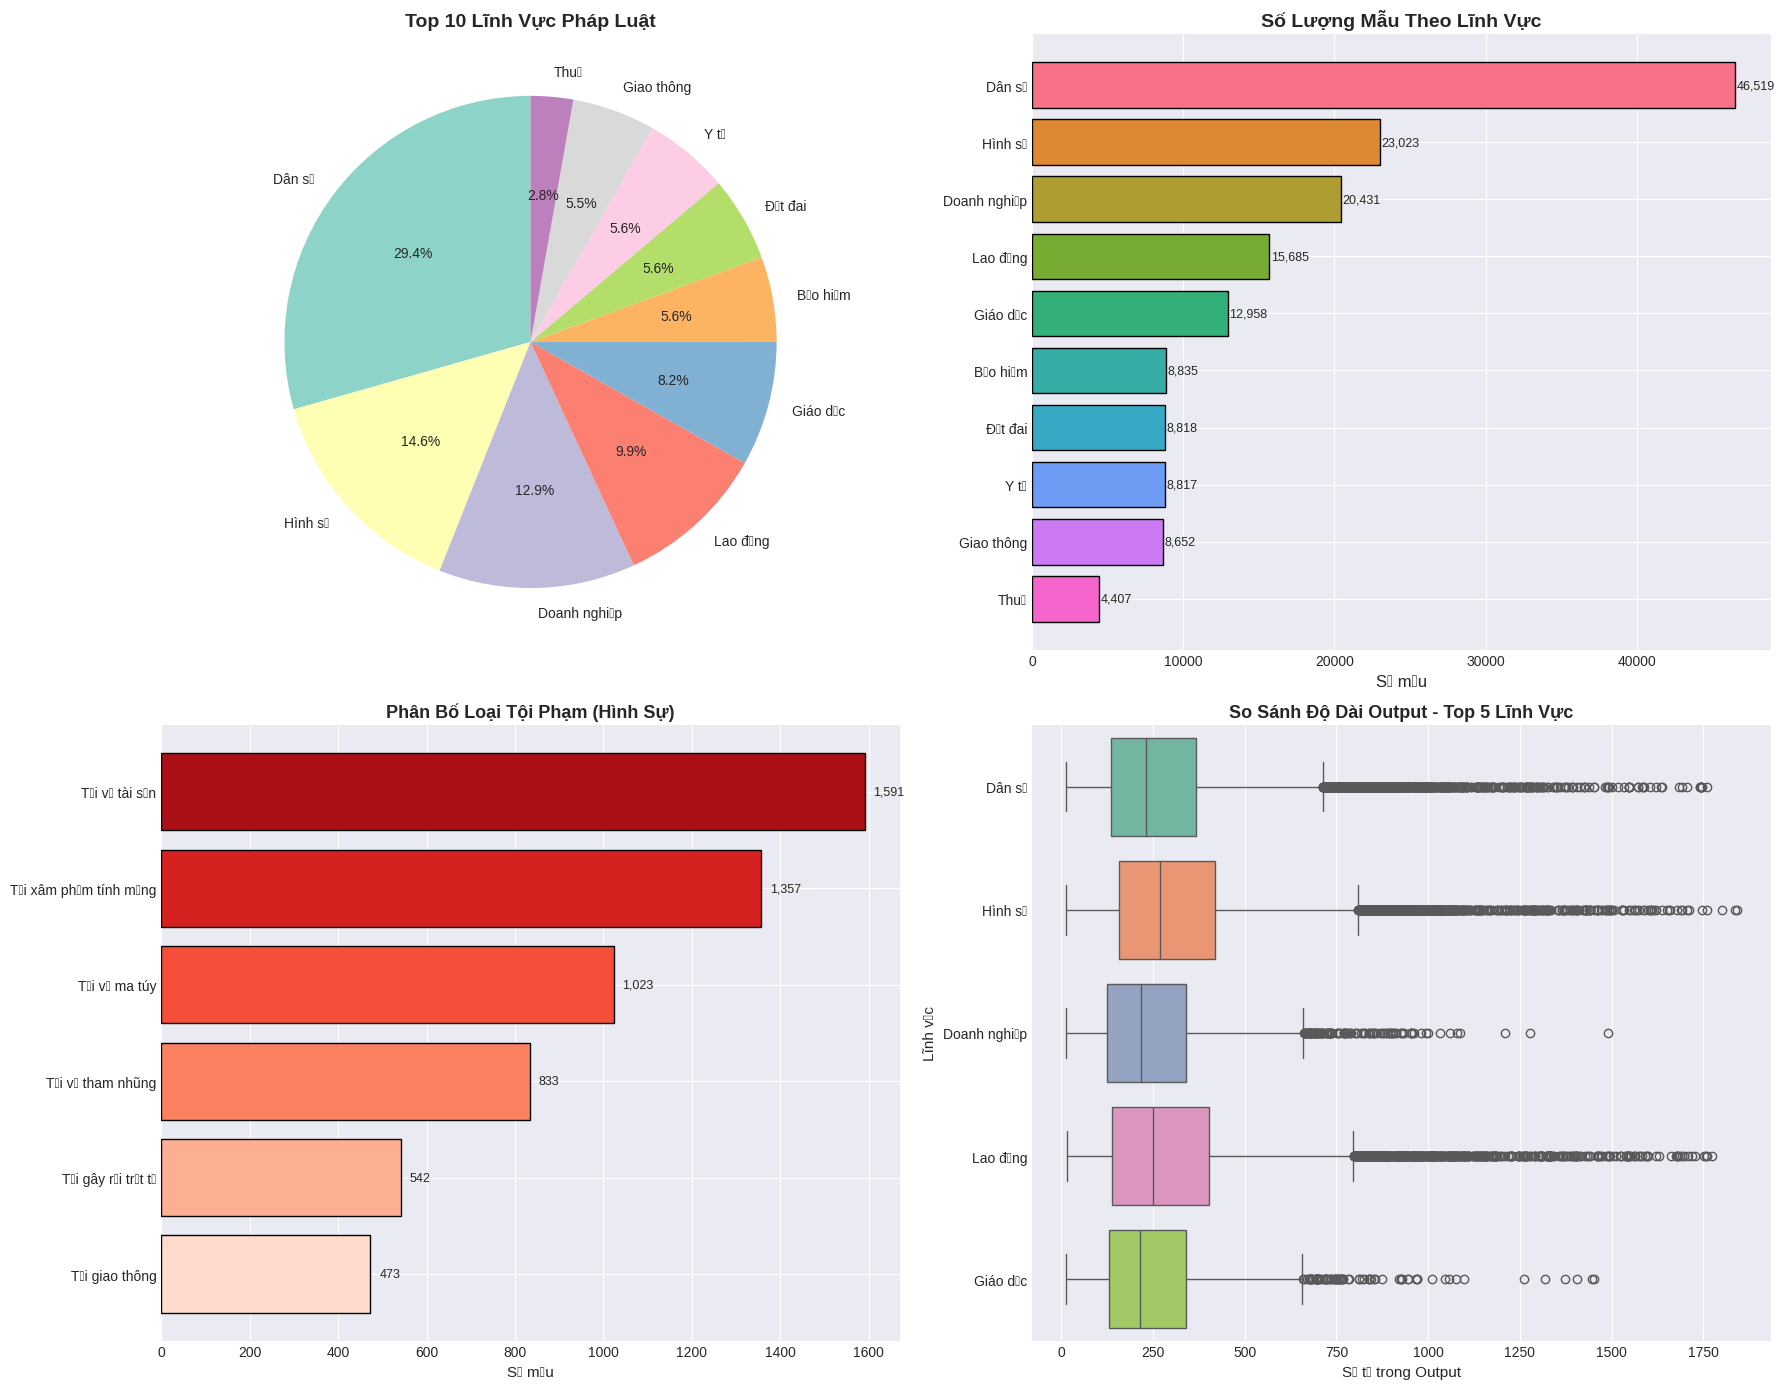

In [10]:
# Visualization: Pie chart và Bar chart lĩnh vực
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Pie chart - Top 10 lĩnh vực
top_10_domains = dict(list(domain_counts_sorted.items())[:10])
colors = sns.color_palette('Set3', len(top_10_domains))
axes[0, 0].pie(top_10_domains.values(), labels=top_10_domains.keys(), autopct='%1.1f%%',
        colors=colors, startangle=90)
axes[0, 0].set_title('Top 10 Lĩnh Vực Pháp Luật', fontsize=14, fontweight='bold')

# Bar chart - Tất cả lĩnh vực
domains = list(domain_counts_sorted.keys())
counts = list(domain_counts_sorted.values())
colors_all = sns.color_palette('husl', len(domains))
axes[0, 1].barh(domains, counts, color=colors_all, edgecolor='black')
axes[0, 1].set_xlabel('Số mẫu', fontsize=12)
axes[0, 1].set_title('Số Lượng Mẫu Theo Lĩnh Vực', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()
for i, v in enumerate(counts):
    axes[0, 1].text(v + 100, i, f'{v:,}', va='center', fontsize=9)

# Phân tích HÌNH SỰ chi tiết hơn
criminal_samples = df[df['domains'].str.contains('Hình sự', na=False)]
print(f"\n⚖️ PHÂN TÍCH CHI TIẾT LĨNH VỰC HÌNH SỰ:")
print("=" * 80)
print(f"Tổng số mẫu Hình sự: {len(criminal_samples):,}")
print(f"Tỷ lệ: {len(criminal_samples)/len(df)*100:.2f}%")
print(f"Độ dài trung bình Output: {criminal_samples['output_words'].mean():.0f} từ")
print(f"Độ dài tối đa Output: {criminal_samples['output_words'].max():,} từ")

# Phân loại các loại tội phạm trong Hình sự
crime_categories = {
    'Tội về tài sản': ['cướp', 'trộm cắp', 'lừa đảo', 'chiếm đoạt', 'cưỡng đoạt', 'tham ô'],
    'Tội xâm phạm tính mạng': ['giết người', 'thương tích', 'hiếp dâm', 'bắt cóc', 'hành hạ'],
    'Tội về ma túy': ['ma túy', 'chất ma túy', 'heroin', 'cocaine', 'methamphetamine'],
    'Tội về tham nhũng': ['tham nhũng', 'hối lộ', 'lạm dụng chức vụ', 'biển thủ'],
    'Tội gây rối trật tự': ['gây rối', 'đánh nhau', 'đánh bạc', 'mại dâm'],
    'Tội giao thông': ['tai nạn giao thông', 'lái xe gây tai nạn', 'say rượu'],
}

crime_counts = {cat: 0 for cat in crime_categories}
for idx in domain_samples['Hình sự']:
    text_lower = (str(df.loc[idx, 'input']) + ' ' + str(df.loc[idx, 'output'])).lower()
    for cat, keywords in crime_categories.items():
        if any(kw in text_lower for kw in keywords):
            crime_counts[cat] += 1

crime_counts_sorted = dict(sorted(crime_counts.items(), key=lambda x: x[1], reverse=True))

print("\n📋 PHÂN LOẠI THEO LOẠI TỘI PHẠM:")
for cat, count in crime_counts_sorted.items():
    if count > 0:
        pct = (count / len(criminal_samples)) * 100 if len(criminal_samples) > 0 else 0
        print(f"  {cat:<25} : {count:>5,} ({pct:>5.1f}%)")

# Bar chart - Loại tội phạm
crime_cats = [cat for cat, count in crime_counts_sorted.items() if count > 0]
crime_vals = [count for count in crime_counts_sorted.values() if count > 0]
colors_crime = sns.color_palette('Reds_r', len(crime_cats))
axes[1, 0].barh(crime_cats, crime_vals, color=colors_crime, edgecolor='black')
axes[1, 0].set_xlabel('Số mẫu', fontsize=11)
axes[1, 0].set_title('Phân Bố Loại Tội Phạm (Hình Sự)', fontsize=13, fontweight='bold')
axes[1, 0].invert_yaxis()
for i, v in enumerate(crime_vals):
    axes[1, 0].text(v + 20, i, f'{v:,}', va='center', fontsize=9)

# Boxplot - So sánh độ dài output giữa các lĩnh vực top
top_5_for_comparison = list(domain_counts_sorted.keys())[:5]
df_compare = df[df['domains'].apply(lambda x: any(d in x for d in top_5_for_comparison))].copy()
df_compare['primary_domain'] = df_compare['domains'].apply(lambda x: x.split(',')[0] if x else 'Khác')
df_compare = df_compare[df_compare['primary_domain'].isin(top_5_for_comparison)]

sns.boxplot(data=df_compare, y='primary_domain', x='output_words', 
            order=top_5_for_comparison, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_ylabel('Lĩnh vực', fontsize=11)
axes[1, 1].set_xlabel('Số từ trong Output', fontsize=11)
axes[1, 1].set_title('So Sánh Độ Dài Output - Top 5 Lĩnh Vực', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## 5.1. Trích Xuất Dữ Liệu Giao Thông

In [11]:
# Lọc và export dữ liệu Giao thông
traffic_df = df[df['domains'].str.contains('Giao thông', na=False)].copy()

# Thêm phân loại loại vấn đề giao thông
def classify_traffic_type(text):
    text_lower = text.lower()
    traffic_types = []
    
    traffic_keywords = {
        'Vi phạm giao thông': ['vi phạm', 'phạt nguội', 'nồng độ cồn', 'say rượu', 'quá tốc độ', 
                               'vượt đèn đỏ', 'không đội mũ bảo hiểm', 'phạt tiền', 'tạm giữ phương tiện'],
        'Bằng lái xe': ['bằng lái', 'giấy phép lái xe', 'thi bằng lái', 'cấp bằng lái', 
                        'đổi bằng lái', 'học lái xe', 'hạng bằng lái', 'bị tước bằng'],
        'Đăng ký xe': ['đăng ký xe', 'biển số xe', 'sang tên xe', 'đổi chủ xe', 
                       'giấy chứng nhận đăng ký xe', 'thủ tục đăng ký', 'cấp biển'],
        'Tai nạn giao thông': ['tai nạn', 'va chạm', 'tông xe', 'gây tai nạn', 
                                'bồi thường tai nạn', 'bỏ trốn sau tai nạn', 'lái xe gây tai nạn'],
        'Bảo hiểm xe': ['bảo hiểm xe', 'bảo hiểm ô tô', 'bảo hiểm bắt buộc', 
                        'bảo hiểm trách nhiệm dân sự', 'phí bảo hiểm'],
        'An toàn giao thông': ['an toàn giao thông', 'mũ bảo hiểm', 'dây an toàn', 
                               'tốc độ cho phép', 'khoảng cách an toàn'],
    }
    
    for traffic_type, keywords in traffic_keywords.items():
        if any(kw in text_lower for kw in keywords):
            traffic_types.append(traffic_type)
    
    return ', '.join(traffic_types) if traffic_types else 'Giao thông khác'

traffic_df['traffic_type'] = traffic_df.apply(
    lambda row: classify_traffic_type(str(row['input']) + ' ' + str(row['output'])), 
    axis=1
)

# Export ra file JSONL
traffic_output_path = '../data/finetune_llm/traffic_law_data.jsonl'

with open(traffic_output_path, 'w', encoding='utf-8') as f:
    for _, row in traffic_df.iterrows():
        json.dump({
            'instruction': row['instruction'],
            'input': row['input'],
            'output': row['output'],
            'domains': row['domains'],
            'traffic_type': row['traffic_type'],
            'output_words': int(row['output_words']),
            'complexity': row.get('complexity', 'Unknown')
        }, f, ensure_ascii=False)
        f.write('\n')

print(f"✅ ĐÃ TRÍCH XUẤT DỮ LIỆU GIAO THÔNG")
print("=" * 80)
print(f"Số lượng mẫu: {len(traffic_df):,}")
print(f"Đường dẫn: {traffic_output_path}")
print(f"\nPhân bố theo loại vấn đề:")
traffic_type_counts = traffic_df['traffic_type'].value_counts()
for traffic_type, count in traffic_type_counts.items():
    pct = (count / len(traffic_df)) * 100
    print(f"  {traffic_type:<30} : {count:>5,} ({pct:>5.1f}%)")

✅ ĐÃ TRÍCH XUẤT DỮ LIỆU GIAO THÔNG
Số lượng mẫu: 8,652
Đường dẫn: ../data/finetune_llm/traffic_law_data.jsonl

Phân bố theo loại vấn đề:
  Giao thông khác                : 3,867 ( 44.7%)
  Vi phạm giao thông             : 1,634 ( 18.9%)
  Đăng ký xe                     :   795 (  9.2%)
  Tai nạn giao thông             :   473 (  5.5%)
  Bằng lái xe                    :   456 (  5.3%)
  An toàn giao thông             :   208 (  2.4%)
  Vi phạm giao thông, Bằng lái xe :   199 (  2.3%)
  Vi phạm giao thông, An toàn giao thông :   168 (  1.9%)
  Vi phạm giao thông, Tai nạn giao thông :   157 (  1.8%)
  Vi phạm giao thông, Tai nạn giao thông, An toàn giao thông :    95 (  1.1%)
  Vi phạm giao thông, Bằng lái xe, Tai nạn giao thông :    89 (  1.0%)
  Vi phạm giao thông, Đăng ký xe :    75 (  0.9%)
  Bằng lái xe, Đăng ký xe, Bảo hiểm xe :    59 (  0.7%)
  Bảo hiểm xe                    :    47 (  0.5%)
  Đăng ký xe, Tai nạn giao thông :    38 (  0.4%)
  Tai nạn giao thông, Bảo hiểm xe :    36

## 6. Phân Tích Độ Phức Tạp

In [11]:
# Đánh giá độ phức tạp dựa trên:
# - Độ dài output
# - Số lượng trích dẫn pháp luật
# - Số câu trong output

df['num_sentences'] = df['output'].apply(lambda x: len(re.findall(r'[.!?]+', x)))
df['num_citations'] = df['output'].apply(lambda x: len(re.findall(r'(Điều|Luật|Nghị định|Thông tư)', x)))

# Phân loại độ phức tạp
def classify_complexity(row):
    score = 0
    if row['output_words'] > 200:
        score += 2
    elif row['output_words'] > 100:
        score += 1
    
    if row['num_citations'] > 5:
        score += 2
    elif row['num_citations'] > 2:
        score += 1
    
    if score >= 3:
        return 'Phức tạp'
    elif score >= 1:
        return 'Trung bình'
    else:
        return 'Đơn giản'

df['complexity'] = df.apply(classify_complexity, axis=1)

complexity_counts = df['complexity'].value_counts()
print("\n🎯 PHÂN BỐ ĐỘ PHỨC TẠP:")
print("=" * 80)
for level, count in complexity_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{level:<15} : {count:>6,} mẫu ({percentage:>5.2f}%)")


🎯 PHÂN BỐ ĐỘ PHỨC TẠP:
Trung bình      : 49,236 mẫu (50.49%)
Phức tạp        : 33,186 mẫu (34.03%)
Đơn giản        : 15,100 mẫu (15.48%)


/tmp/ipykernel_16264/3422291522.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='complexity', y='output_words', order=complexity_order,
/tmp/ipykernel_16264/3422291522.py:23: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_16264/3422291522.py:23: UserWarning: Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_16264/3422291522.py:23: UserWarning: Glyph 7913 (\N{LATIN SMALL LETTER U WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_16264/3422291522.py:23: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_16264/3422291522.py:2

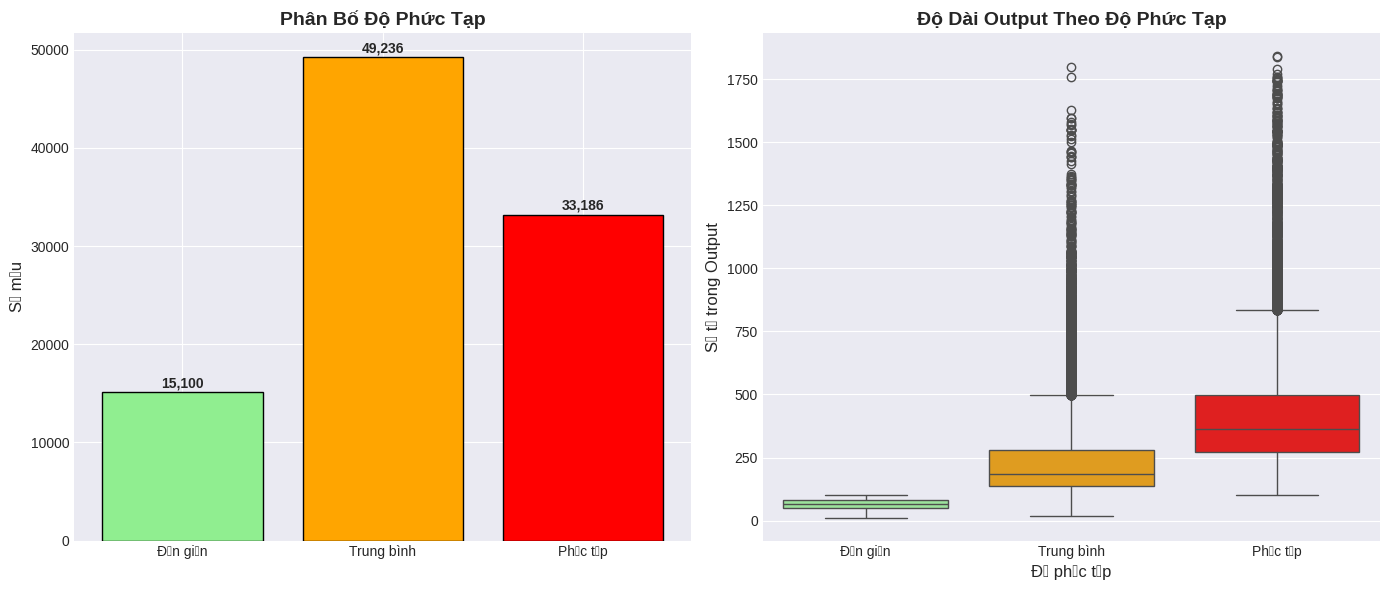

In [12]:
# Visualization: Complexity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
complexity_order = ['Đơn giản', 'Trung bình', 'Phức tạp']
colors_complexity = ['lightgreen', 'orange', 'red']
counts_ordered = [complexity_counts.get(c, 0) for c in complexity_order]

axes[0].bar(complexity_order, counts_ordered, color=colors_complexity, edgecolor='black')
axes[0].set_ylabel('Số mẫu', fontsize=12)
axes[0].set_title('Phân Bố Độ Phức Tạp', fontsize=14, fontweight='bold')
for i, v in enumerate(counts_ordered):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Box plot: Output length by complexity
df_plot = df[df['complexity'].isin(complexity_order)]
sns.boxplot(data=df_plot, x='complexity', y='output_words', order=complexity_order, 
            palette=colors_complexity, ax=axes[1])
axes[1].set_xlabel('Độ phức tạp', fontsize=12)
axes[1].set_ylabel('Số từ trong Output', fontsize=12)
axes[1].set_title('Độ Dài Output Theo Độ Phức Tạp', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Đề Xuất cho Fine-tuning

In [13]:
print("\n" + "=" * 80)
print("📋 TÓM TẮT & ĐỀ XUẤT CHO FINE-TUNING")
print("=" * 80)

print(f"\n1. TỔNG QUAN DATASET:")
print(f"   - Tổng số mẫu: {len(df):,}")
print(f"   - Độ dài trung bình Input: {df['input_words'].mean():.0f} từ")
print(f"   - Độ dài trung bình Output: {df['output_words'].mean():.0f} từ")
print(f"   - Độ dài tối đa Output: {df['output_words'].max():,} từ")

print(f"\n2. PHÂN BỐ ĐỘ PHỨC TẠP:")
for level in complexity_order:
    count = complexity_counts.get(level, 0)
    pct = (count / len(df)) * 100
    print(f"   - {level}: {count:,} ({pct:.1f}%)")

print(f"\n3. ĐỀ XUẤT CHO TRAINING:")
print(f"   ✓ Max sequence length: 2048 tokens (cover ~95% samples)")
print(f"   ✓ Batch size: 4-8 (phù hợp với 2xT4 GPU)")
print(f"   ✓ Gradient accumulation: 4-8 steps")
print(f"   ✓ LoRA rank: 16-32")
print(f"   ✓ Learning rate: 2e-4 đến 5e-5")
print(f"   ✓ Epochs: 2-3 (với ~97k samples)")

print(f"\n4. MODEL ĐỀ XUẤT:")
print(f"   ✓ Qwen2.5-7B-Instruct (tốt cho tiếng Việt)")
print(f"   ✓ Llama-3.2-8B-Instruct")
print(f"   ✓ Mistral-7B-Instruct-v0.3")
print(f"   ✓ Gemma-2-9B-It")

print(f"\n5. TỐI ƯU CHO KAGGLE (30h/week, 2xT4):")
print(f"   ✓ Sử dụng Unsloth để tăng tốc 2-5x")
print(f"   ✓ QLoRA (4-bit) để tiết kiệm VRAM")
print(f"   ✓ Flash Attention 2")
print(f"   ✓ Gradient checkpointing")
print(f"   ✓ Mixed precision training (bfloat16)")

# Tính toán thời gian ước tính
samples = len(df)
batch_size = 4
grad_accum = 8
epochs = 3
steps_per_epoch = samples // (batch_size * grad_accum)
total_steps = steps_per_epoch * epochs
# Ước tính ~1.5 sec/step với Unsloth
estimated_hours = (total_steps * 1.5) / 3600

print(f"\n6. THỜI GIAN ƯỚC TÍNH:")
print(f"   - Steps per epoch: ~{steps_per_epoch:,}")
print(f"   - Total steps: ~{total_steps:,}")
print(f"   - Thời gian training: ~{estimated_hours:.1f}h (với Unsloth)")
print(f"   - Vừa đủ với giới hạn 30h/week của Kaggle ✓")

print("\n" + "=" * 80)


📋 TÓM TẮT & ĐỀ XUẤT CHO FINE-TUNING

1. TỔNG QUAN DATASET:
   - Tổng số mẫu: 97,522
   - Độ dài trung bình Input: 37 từ
   - Độ dài trung bình Output: 268 từ
   - Độ dài tối đa Output: 1,842 từ

2. PHÂN BỐ ĐỘ PHỨC TẠP:
   - Đơn giản: 15,100 (15.5%)
   - Trung bình: 49,236 (50.5%)
   - Phức tạp: 33,186 (34.0%)

3. ĐỀ XUẤT CHO TRAINING:
   ✓ Max sequence length: 2048 tokens (cover ~95% samples)
   ✓ Batch size: 4-8 (phù hợp với 2xT4 GPU)
   ✓ Gradient accumulation: 4-8 steps
   ✓ LoRA rank: 16-32
   ✓ Learning rate: 2e-4 đến 5e-5
   ✓ Epochs: 2-3 (với ~97k samples)

4. MODEL ĐỀ XUẤT:
   ✓ Qwen2.5-7B-Instruct (tốt cho tiếng Việt)
   ✓ Llama-3.2-8B-Instruct
   ✓ Mistral-7B-Instruct-v0.3
   ✓ Gemma-2-9B-It

5. TỐI ƯU CHO KAGGLE (30h/week, 2xT4):
   ✓ Sử dụng Unsloth để tăng tốc 2-5x
   ✓ QLoRA (4-bit) để tiết kiệm VRAM
   ✓ Flash Attention 2
   ✓ Gradient checkpointing
   ✓ Mixed precision training (bfloat16)

6. THỜI GIAN ƯỚC TÍNH:
   - Steps per epoch: ~3,047
   - Total steps: ~9,141
   

## 8. Export Sample Data

In [14]:
# Export một số mẫu để kiểm tra
sample_size = 100
df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)
sample_output_path = '../data/finetune_llm/sample_data.jsonl'

with open(sample_output_path, 'w', encoding='utf-8') as f:
    for _, row in df_sample.iterrows():
        json.dump({
            'instruction': row['instruction'],
            'input': row['input'],
            'output': row['output']
        }, f, ensure_ascii=False)
        f.write('\n')

print(f"✓ Đã export {sample_size} mẫu vào {sample_output_path}")

✓ Đã export 100 mẫu vào ../data/finetune_llm/sample_data.jsonl


In [15]:
# Summary statistics to CSV
summary = pd.DataFrame({
    'Metric': ['Total Samples', 'Avg Input Length', 'Avg Output Length', 
               'Max Output Length', 'Avg Citations'],
    'Value': [len(df), df['input_words'].mean(), df['output_words'].mean(),
              df['output_words'].max(), df['num_citations'].mean()]
})

summary.to_csv('../data/finetune_llm/data_summary.csv', index=False)
print("✓ Đã lưu summary vào data_summary.csv")

✓ Đã lưu summary vào data_summary.csv
